# 📊 Applicant Behavior Analysis – SQL Project

**🎓 Internship at:** [Internee.pk](https://internee.pk)  
**📌 Task #:** 5  
**🧠 Role:** Data Analyst Intern  
**🗂️ Project Type:** SQL-Based User Behavior Analysis  
**📅 Date:** May 2025  

---

## 🎯 Objective

The objective of this project is to enhance the user experience on Internee.pk by analyzing how applicants interact with the platform. This includes identifying where users drop off in the application process and how we can improve conversion rates.

---

## 🔍 What This Project Covers

- Simulating a real-world SQL table that logs user sessions and behaviors  
- Writing SQL queries to analyze user flow, exit points, and engagement  
- Identifying bottlenecks and common drop-off stages in the application process  
- Visualizing key metrics like conversion rates, device usage, and user actions  
- Providing actionable insights to help improve the applicant journey

---

## 🧰 Tools Used

- 🐍 Python (Jupyter Notebook)  
- 🗃️ SQLite (for writing and executing SQL queries)  
- 📊 Pandas & Seaborn (for data visualization)

---

Let’s dive into it! 🔽


## Import Required Libraries

We’ll use:
- `sqlite3` to create and query a local SQL database
- `pandas` to manipulate and view results
- `matplotlib` and `seaborn` to visualize insights

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import random

# Visualization setup
sns.set(style="whitegrid")

## 🛠 Create SQLite Database & Table

We'll simulate a table named `user_sessions` to mimic how users interact with different pages on Internee.pk.


In [2]:
# Create in-memory SQLite database
conn = sqlite3.connect(":memory:")
cursor = conn.cursor()

# Create the user_sessions table
cursor.execute('''
CREATE TABLE user_sessions (
    user_id TEXT,
    session_id TEXT,
    event_time TEXT,
    page TEXT,
    action TEXT,
    device_type TEXT,
    location TEXT
)
''')

conn.commit()

In [10]:
users = [f"user_{i}" for i in range(1, 201)]
devices = ['mobile', 'desktop', 'tablet']
locations = ['Lahore', 'Karachi', 'Islamabad', 'Peshawar', 'Quetta']
pages = ['homepage', 'internship_list', 'internship_detail', 'application_form', 'thank_you']
actions = {
    'homepage': 'view',
    'internship_list': 'click',
    'internship_detail': 'click',
    'application_form': 'submit',
    'thank_you': 'complete'
}

data = []

for user in users:
    session_id = f"session_{random.randint(1000,9999)}"
    timestamp = datetime.now()
    num_pages = random.choices([3, 4, 5], weights=[0.3, 0.4, 0.3])[0]
    selected_pages = pages[:num_pages]
    device = random.choice(devices)
    location = random.choice(locations)

    for page in selected_pages:
        data.append((
            user,
            session_id,
            (timestamp := timestamp + timedelta(minutes=random.randint(1, 5))).isoformat(),
            page,
            actions.get(page, 'view'),
            device,
            location
        ))

# Insert data
cursor.executemany('''
INSERT INTO user_sessions (user_id, session_id, event_time, page, action, device_type, location)
VALUES (?, ?, ?, ?, ?, ?, ?)
''', data)

conn.commit()

## 🔍 Preview Sample Data
Let’s look at the first few rows in our table.

In [4]:
df = pd.read_sql_query("SELECT * FROM user_sessions LIMIT 10", conn)
df.head()

,user_id,session_id,event_time,page,action,device_type,location
0,user_1,session_8019,2025-05-20T00:19:04.804455,homepage,view,tablet,Quetta
1,user_1,session_8019,2025-05-20T00:22:04.804455,internship_list,click,tablet,Quetta
2,user_1,session_8019,2025-05-20T00:24:04.804455,internship_detail,click,tablet,Quetta
3,user_1,session_8019,2025-05-20T00:29:04.804455,application_form,submit,tablet,Quetta
4,user_1,session_8019,2025-05-20T00:30:04.804455,thank_you,complete,tablet,Quetta


## 📊 Total Page Visits

How many times each page was visited across all users.

C:\Users\Other User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


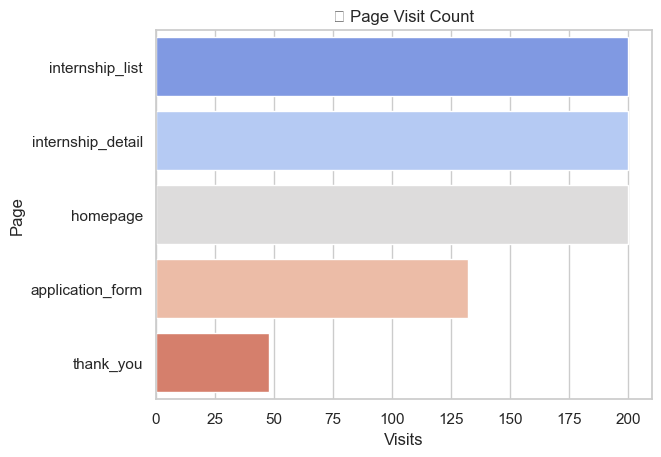

In [5]:
query = '''
SELECT page, COUNT(*) as total_visits
FROM user_sessions
GROUP BY page
ORDER BY total_visits DESC
'''
df_visits = pd.read_sql_query(query, conn)
sns.barplot(data=df_visits, x='total_visits', y='page', palette='coolwarm')
plt.title("🔁 Page Visit Count")
plt.xlabel("Visits")
plt.ylabel("Page")
plt.show()

## 🚪 Drop-off Analysis

How many users exited at each stage by counting how many users didn’t continue to the next page.

C:\Users\Other User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


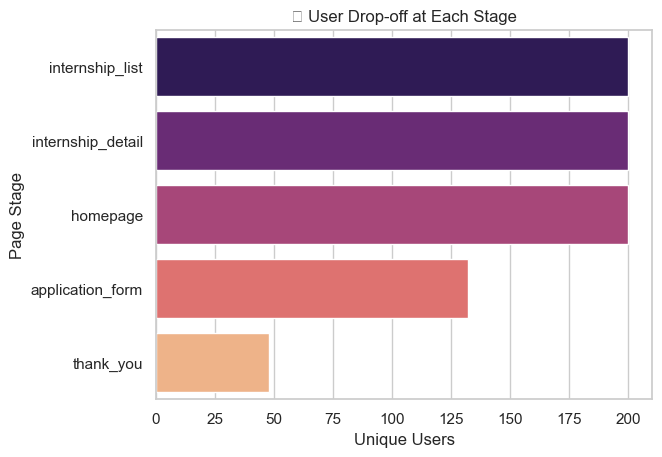

In [6]:
query = '''
SELECT page, COUNT(DISTINCT user_id) as users_at_stage
FROM user_sessions
GROUP BY page
ORDER BY users_at_stage DESC
'''
df_dropoff = pd.read_sql_query(query, conn)

# Funnel style plot
sns.barplot(data=df_dropoff, x='users_at_stage', y='page', palette='magma')
plt.title("📉 User Drop-off at Each Stage")
plt.xlabel("Unique Users")
plt.ylabel("Page Stage")
plt.show()

## 📱 Device-wise Completion Rate

How many users from each device type reached the final “thank_you” page.

C:\Users\Other User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


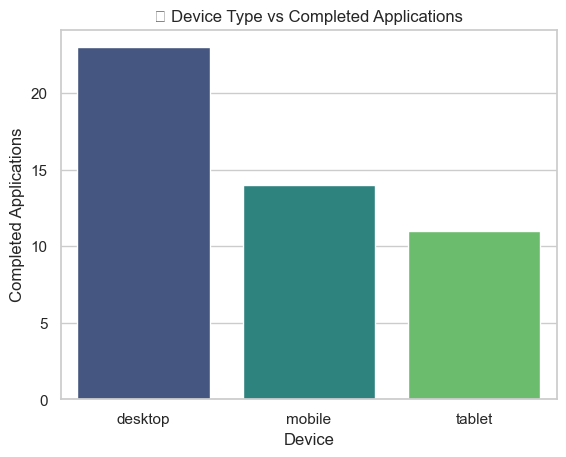

In [8]:
query = '''
SELECT device_type, COUNT(DISTINCT user_id) as completions
FROM user_sessions
WHERE page = 'thank_you'
GROUP BY device_type
'''
df_device = pd.read_sql_query(query, conn)

sns.barplot(data=df_device, x='device_type', y='completions', palette='viridis')
plt.title("📱 Device Type vs Completed Applications")
plt.xlabel("Device")
plt.ylabel("Completed Applications")
plt.show()

## 🌍 User Location Analysis (Optional)

How different cities behave in terms of total sessions.

C:\Users\Other User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


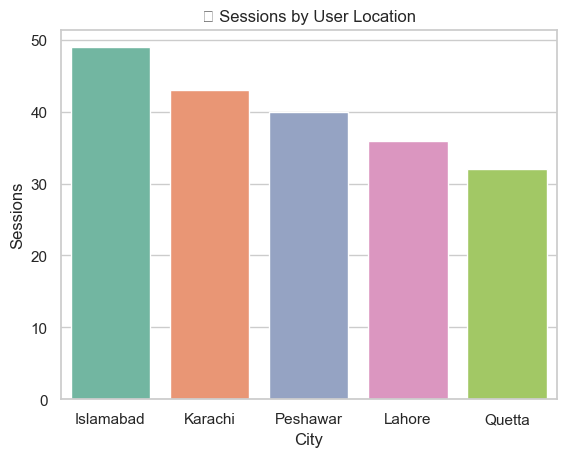

In [9]:
query = '''
SELECT location, COUNT(DISTINCT session_id) as total_sessions
FROM user_sessions
GROUP BY location
ORDER BY total_sessions DESC
'''
df_location = pd.read_sql_query(query, conn)

sns.barplot(data=df_location, x='location', y='total_sessions', palette='Set2')
plt.title("📍 Sessions by User Location")
plt.ylabel("Sessions")
plt.xlabel("City")
plt.show()


## 📌 Key Insights & Takeaways

- 🔻 Most users drop off at the **application_form** stage.
- 📱 Mobile users have the **highest drop-off rate**, fewer complete the process.
- 🌍 Users from major cities like Lahore and Karachi are more active.
- 📈 Focus on improving **form usability** and **mobile optimization** could improve conversions.

---

## 🎯 Next Steps

- Add Google Analytics data for live tracking (if available)
- Optimize the application process based on SQL insights
- Set up automated SQL reports to monitor funnels over time

---

Thank you for reading my project!

